<a href="https://colab.research.google.com/github/spikeyme/finalproject/blob/main/CS50ThornProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #Allows us to use dataframes instead of a .csv, which we can more easily add columns to.
import numpy as np #Allows us to create arrays for statistical analysis
import matplotlib.pyplot as plt #Allows us to plot graphs
import urllib.request #Allows us to easily open urls
import requests #Allows us to make http requests
import sys #Allows us to install libraries on the system
!{sys.executable} -m pip install yfinance #Installs the yfinance library
import yfinance as yf #imports the yfinance library which extracts data from Yahoo Finance
import pandas_datareader as pdr #Allows us to extract data from internet sources and use them in pandas
from datetime import datetime #Allows us to convert strings into dates
from scipy.stats import linregress #Allows us to conduct linear regression analysis

     |████████████████████████████████| 5.5MB 9.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=1c72a1f684f7c0868e977f3cc440675ac857c72c673a8276bde4d4f6002e770f
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
yf.pdr_override() #'Hijacks' the pandas_datareader module to make it so that our extracted data from yahoo finance is in the same format as that used in pandas_datareader
DowJones = pdr.get_data_yahoo("^DJI", start="2020-01-22") #Downloading data from the Dow Jones, beginning from the 22nd of January (Start of Pandemic in the US)

In [5]:
print(DowJones)

                    High           Low  ...     Volume     Adj Close
Date                                    ...                         
2020-01-22  29320.199219  29172.259766  ...  283440000  29186.269531
2020-01-23  29190.470703  28966.980469  ...  307060000  29160.089844
2020-01-24  29288.789062  28843.310547  ...  380010000  28989.730469
2020-01-27  28671.789062  28440.470703  ...  337270000  28535.800781
2020-01-28  28823.230469  28575.750000  ...  330140000  28722.849609
...                  ...           ...  ...        ...           ...
2020-12-03  30110.880859  29877.269531  ...  405680000  29969.519531
2020-12-04  30218.259766  29989.560547  ...  356590000  30218.259766
2020-12-07  30233.029297  29967.220703  ...  365810000  30069.789062
2020-12-08  30246.220703  29972.070312  ...  311190000  30173.880859
2020-12-09  30319.699219  29951.849609  ...  286484993  30058.900391

[225 rows x 6 columns]


However, while we now have the Dow Jones stock data, we have an issue: The date, which we are going to use to merge Dow Jones data with covid data, is an index, not a column. To solve this, we are going to first convert our Dow Jones data into a Pandas Dataframe, then add a column named 'Date1' which contains the values in the Date index.

In [6]:
DowJonesdf = pd.DataFrame(DowJones) #Converting our data into a pandas dataframe
DowJonesdf["Date1"] = DowJonesdf.index #Making a new column, 'Date1', which has the same values as the index (which conains dates)
print(DowJonesdf)

                    High           Low  ...     Adj Close      Date1
Date                                    ...                         
2020-01-22  29320.199219  29172.259766  ...  29186.269531 2020-01-22
2020-01-23  29190.470703  28966.980469  ...  29160.089844 2020-01-23
2020-01-24  29288.789062  28843.310547  ...  28989.730469 2020-01-24
2020-01-27  28671.789062  28440.470703  ...  28535.800781 2020-01-27
2020-01-28  28823.230469  28575.750000  ...  28722.849609 2020-01-28
...                  ...           ...  ...           ...        ...
2020-12-03  30110.880859  29877.269531  ...  29969.519531 2020-12-03
2020-12-04  30218.259766  29989.560547  ...  30218.259766 2020-12-04
2020-12-07  30233.029297  29967.220703  ...  30069.789062 2020-12-07
2020-12-08  30246.220703  29972.070312  ...  30173.880859 2020-12-08
2020-12-09  30319.699219  29951.849609  ...  30058.900391 2020-12-09

[225 rows x 7 columns]


We now have our Pandas dataframe with the data column added. Now we are going to plot a line graph of Dow Jones value along time. To do this, we are going to create two lists: The first of which is the 'Close' column, or closing price and the second is our 'Date1 column', or dates. We first need to check if the values in our datetime column are actually 'dates', not strings, 

''

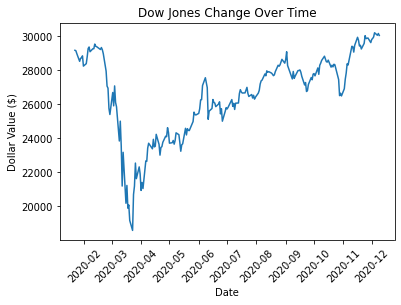

In [8]:
DowClosingPrice = DowJonesdf['Close'] #Creates a variable for our Y axis, which uses the Closing price of Dow Jones
Date = DowJonesdf['Date1'] #Creates a variable for our X axis, which uses the Date1 column we made earlier
plt.plot(Date, DowClosingPrice) #Plots the value of the Dow Jones over time
plt.title('Dow Jones Change Over Time') #Gives our graphs a title
plt.xticks(rotation = 45) #Rotates the tickers on our axis, so as to display them all
plt.xlabel('Date') #Labels our x-axis
plt.ylabel('Dollar Value ($)') #Labels our y-axis
;

Now We will do the same for the S&P 500, another common financial index.

''

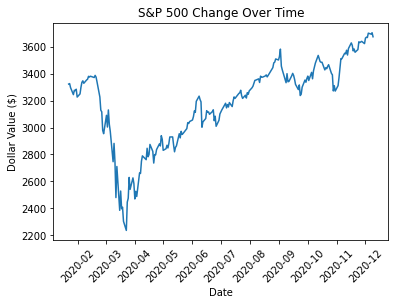

In [10]:
SP500 = pdr.get_data_yahoo("^GSPC", start="2020-01-22") #Extracts data from Yahoo finance for the S&P 500, from the 22nd of January till today.
SP500df = pd.DataFrame(SP500) #Converts this data to a pandas dataframe
SP500df["Date1"] = SP500df.index #Adds a column with the date index values
SandPClosingPrice = SP500df['Close'] #Creates a variable for our Y axis, which uses the Closing price of the S&P500
SPDate = SP500df['Date1'] #Creates a variable for the X axis, which uses the date column we made
plt.plot(SPDate, SandPClosingPrice) #Plots S&P500 value over time
plt.title('S&P 500 Change Over Time') #Adds a title
plt.xticks(rotation = 45) #Rotates tickers
plt.xlabel('Date') #Labels X axis
plt.ylabel('Dollar Value ($)') #Labels Y axis
;

Finally, we will do the same for the Nasdaq

''

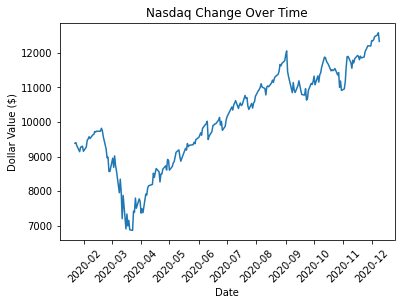

In [11]:
Nasdaq = pdr.get_data_yahoo("^IXIC", start="2020-01-22") #Extracts data from Yahoo finance for the Nasdaq, from the 22nd of January till today.
Nasdaqdf = pd.DataFrame(Nasdaq) #Converts this to a dataframe
Nasdaqdf["Date1"] = Nasdaqdf.index #Creates date column from index
NasdaqClosingPrice = Nasdaqdf['Close'] #Sets y-axis as closing price
NasdaqDate = Nasdaqdf['Date1'] #Sets x-axis as date
plt.plot(NasdaqDate, NasdaqClosingPrice) #Plots Nasdaq
plt.title('Nasdaq Change Over Time') #Adds title
plt.xticks(rotation = 45) #Rotates tickers
plt.xlabel('Date') #Adds x-axis label
plt.ylabel('Dollar Value ($)') #Adds y-axis label
;

In [12]:
stockticker = input("Please Input Stock Ticker: ") #Takes user input of the Ticker of a stock of their choice
print(stockticker)

Please Input Stock Ticker: GOOGL
GOOGL


In [13]:
YourStockdata = pdr.get_data_yahoo(stockticker, start="2020-01-22") #Queries and downloads data from yahoo finance for the stock with that ticker, from 22nd of january onwards
print(YourStockdata)

                   High          Low  ...   Volume    Adj Close
Date                                  ...                      
2020-01-22  1500.579956  1482.660034  ...  1422900  1483.869995
2020-01-23  1493.500000  1480.319946  ...  1332500  1484.689941
2020-01-24  1494.199951  1463.180054  ...  1489300  1466.170044
2020-01-27  1436.579956  1419.500000  ...  1706600  1431.729980
2020-01-28  1454.800049  1430.359985  ...  1486200  1450.500000
...                 ...          ...  ...      ...          ...
2020-12-03  1843.829956  1817.000000  ...  1236400  1821.839966
2020-12-04  1829.500000  1813.589966  ...  1027200  1823.760010
2020-12-07  1829.290039  1803.040039  ...  1114400  1817.030029
2020-12-08  1815.969971  1791.280029  ...   996300  1811.329956
2020-12-09  1828.369995  1762.000122  ...  1039253  1773.000000

[225 rows x 6 columns]


''

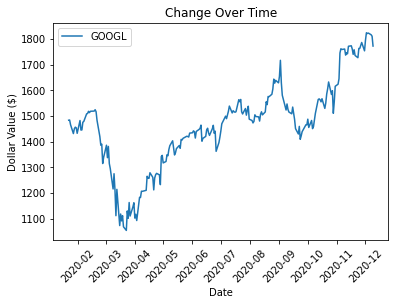

In [14]:
YourStockdf = pd.DataFrame(YourStockdata) #Convert stock data to dataframe
YourStockdf["Date1"] = YourStockdf.index #Creates date column from index
YourStockClosingPrice = YourStockdf['Close'] #Creates Y axis of stock closing price
YourStockDate = YourStockdf['Date1'] #Creates X axis of stock closing price
plt.plot(YourStockDate, YourStockClosingPrice, label = stockticker) #Plots graph
plt.title('Change Over Time') #Gives graph title
plt.xticks(rotation = 45) #Rotates tickers
plt.xlabel('Date') #Labels X Axis
plt.ylabel('Dollar Value ($)') #Labels Y Axis
plt.legend() #Shows stock ticker / labels graph
;

Now, we will combine these graphs into one.


''

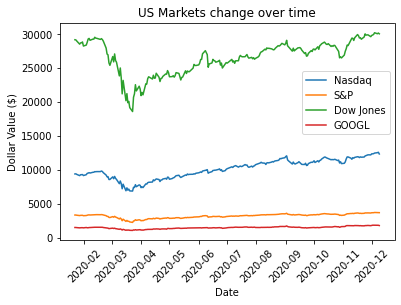

In [15]:
plt.plot(NasdaqDate, NasdaqClosingPrice, label = "Nasdaq") #Plots Nasdaq and labels it
plt.plot(SPDate, SandPClosingPrice, label = 'S&P') #Plots S&P500 and labels it
plt.plot(Date, DowClosingPrice, label = 'Dow Jones') #plots Dow Jones and labels it
plt.plot(YourStockDate,YourStockClosingPrice, label = stockticker ) #Plots your stock and labels it
plt.title('US Markets change over time') #Adds title to graph
plt.xticks(rotation = 45) #Rotates tickers
plt.xlabel('Date') #Labels x-axis
plt.ylabel('Dollar Value ($)') #Labels y-axis
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.3, 0.5, 0.5)) #Creates legend labelling the lines, and places it where we want it to be.
;

As is likely the case with your stock above, relative to these indexes it is hard to see any change, so we will include some additional plots.

''

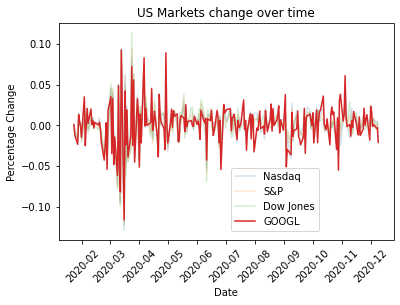

In [16]:
plt.plot(NasdaqDate, NasdaqClosingPrice.pct_change(), label = "Nasdaq", alpha = 0.2) #Plots the daily percentage change of the Nasdaq, gives it a label and also makes it more transparent.
plt.plot(SPDate, SandPClosingPrice.pct_change(), label = 'S&P', alpha = 0.2) #Plots the daily percentage change of the S&P 500, gives it a label and also makes it more transparent.
plt.plot(Date, DowClosingPrice.pct_change(), label = 'Dow Jones', alpha = 0.2) #Plots the daily percentage change of the Dow, gives it a label and also makes it more transparent.
plt.plot(YourStockDate,YourStockClosingPrice.pct_change(), label = stockticker ) #Plots the daily percentage change of the Nasdaq and gives it a label.
plt.title('US Markets change over time') #Gives graph a title
plt.xticks(rotation = 45) #Rotates x-axis tickers.
plt.xlabel('Date') #Labels X-axis
plt.ylabel('Percentage Change') #Labels Y-axis
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.02, 0.5, 0.5)) #Creates and moves legend
;

In [17]:
date = input("Input today's date in Y-M-D format: ") #Asks for todays date in the form of input from the user.
print(date)

Input today's date in Y-M-D format: 2020-12-09
2020-12-09


In [18]:
DowJonesToday = DowJonesdf.at[date,'Close'] #Obtains today's closing value for the Dow from the dataframe
SP500Today = SP500df.at[date,'Close'] #Obtains today's closing value for the S&P 500 from the dataframe
NasdaqToday = Nasdaqdf.at[date,'Close'] #Obtains today's closing value for the Nasdaq from the dataframe
YourStockToday = YourStockdf.at[date,'Close'] #Obtains today's closing value for your stock from the dataframe
DowJonesCovid = DowJonesdf.at['2020-1-22','Close'] #Obtains the value of the Dow when Covid first reached the US (from the dataframe)
SP500Covid = SP500df.at['2020-1-22','Close'] #Obtains the value of the S&P500 on the 22nd of January from the dataframe
NasdaqCovid = Nasdaqdf.at['2020-1-22','Close'] #Obtains the value of the Nasdaq on the 22nd of January from the dataframe
YourStockCovid = YourStockdf.at['2020-1-22','Close'] #Obtains the value of your stock on the 22nd of January from the dataframe
print("Dow Jones Today's Price:" ,DowJonesToday)
print("S&P500 Value Today:", SP500Today)
print("Nasdaq Value Today:", NasdaqToday)
print(stockticker,"Value Today:", YourStockToday)

Dow Jones Today's Price: 30058.900390625
S&P500 Value Today: 3672.409912109375
Nasdaq Value Today: 12332.0537109375
GOOGL Value Today: 1773.0


We will now use the variables we calculated above to calculate the percent change of your stock, and the indexes, since Covid started.

In [19]:
DowPercentChange = ((DowJonesToday - DowJonesCovid)/DowJonesCovid)*1000 #Calculates percentage change for Dow 
SP500PercentChange = ((SP500Today - SP500Covid)/SP500Covid)*100 #Calculates percent change for S&P500
NasdaqPercentChange = ((NasdaqToday - NasdaqCovid)/ NasdaqCovid)*100 #Calculates percent change for Nasdaq
YourStockPercentChange = ((YourStockToday - YourStockCovid)/ YourStockCovid)*100 #Calculates percent change for your stock
print("Dow Jones %Change since Covid:", DowPercentChange)
print("S&P500 %Change since Covid:", SP500PercentChange)
print("Nasdaq %Change since Covid:", NasdaqPercentChange)
print(stockticker,"%Change since Covid:", YourStockPercentChange)

Dow Jones %Change since Covid: 29.898677473689
S&P500 %Change since Covid: 10.55648113522616
Nasdaq %Change since Covid: 31.41897475070195
GOOGL %Change since Covid: 19.484860926780765


Since reading is hard, and numbers might be similar, I created a function to check if your chosen stock has outperformed the key indexes of the US financial system since Covid began.

In [20]:
def stockFunction(): #Defines function to check
  if (YourStockPercentChange > DowPercentChange) and (YourStockPercentChange > SP500PercentChange) and (YourStockPercentChange > NasdaqPercentChange) :
    return True; #Condition to check if your stock has outperformed the indices
if stockFunction(): #Result if it's true
  print('Okk, money man 🤑🤑');
else: #Result if it's false
  print("Stick to ETFs, yikers :/")

Stick to ETFs, yikers :/


We will now create a bar chart to display overall change since start of pandemic for the indices and for your stock

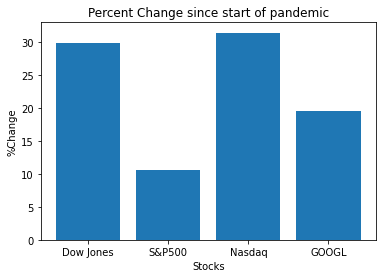

In [21]:
PercentTitles = ['Dow Jones', 'S&P500', 'Nasdaq', stockticker] #Sets up titles for bars.
PercentChanges = [DowPercentChange , SP500PercentChange, NasdaqPercentChange , YourStockPercentChange] #Sets up y-axis for bars
plt.bar(PercentTitles, PercentChanges) #Plots Bars
plt.title('Percent Change since start of pandemic') #Adds title
plt.xlabel('Stocks') #Adds x axis label
plt.ylabel('%Change'); #Adds y axis label

We will now move on to incorporating COVID statistics to directly compare to our stocks and run analysis with.

In [25]:
url = 'https://api.covidtracking.com/v1/us/daily.csv' #This is the url of the API to access the historical data for US Covid Cases
urllib.request.urlretrieve(url, 'daily.csv') #Accesses the url, and retrieves the .csv file with US Covid Data
CovidData = pd.read_csv('daily.csv') #Reads the .csv file into the working environment
Coviddf = pd.DataFrame(CovidData) #Converts the .csv file into a pandas dataframe
Coviddf.rename(columns={'date': 'Date1'}, inplace=True) #Renames the column named 'date' to 'Date1', for easier merging later on
print(CovidData)

        Date1  ...                                      hash
0    20201208  ...  8cfb70eb28d8b19c09b40b542fa2a8d85e0c66ea
1    20201207  ...  22b8f0d141bcd61226461160023a7f70aaaf41da
2    20201206  ...  2c651a7560972a7100e69df078f8ece1c0d64bf0
3    20201205  ...  892d4dabd64f65ad83eee4456225fcbe2d4d7c17
4    20201204  ...  ae30ea088584335ba4d57ee927f8dbda6add74db
..        ...  ...                                       ...
317  20200126  ...  69c67c81e64d10a5270497fc5336779c06fb812b
318  20200125  ...  9ea5731f5b0a79617b994d6842eecfdbeb1dde35
319  20200124  ...  287531342bc8d5f2650b0cc12ebcca3807a64b7b
320  20200123  ...  e0563aac8e1bc7b8b8059c52831b97179ff6f981
321  20200122  ...  e0caa1c66c4aa83baf227afe12261a1493fc0d7e

[322 rows x 25 columns]


In [28]:
date = Coviddf['Date1'] #Checking the format of the date column to make sure it is in datetime format.
print(date)
print(date.dtypes)

0      20201208
1      20201207
2      20201206
3      20201205
4      20201204
         ...   
317    20200126
318    20200125
319    20200124
320    20200123
321    20200122
Name: Date1, Length: 322, dtype: int64
int64


Since dates are of type int64, and not datetime, in order to compare them we need to convert the dates to datetime format.

''

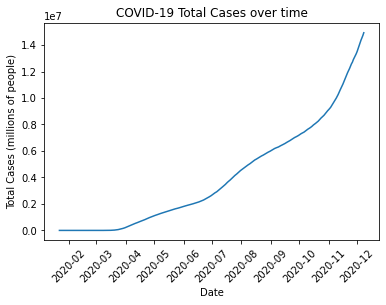

In [30]:
Coviddf['Date1'] = pd.to_datetime(Coviddf['Date1'], format='%Y%m%d') #Convert integer to datetime
CovidCases = CovidData['positive'] #Setting Y-axis as covid cases
Date = CovidData['Date1'] #Setting X-axis as Date
plt.plot(Date, CovidCases) #Creating plot of covid cases over time
plt.title('COVID-19 Total Cases over time') #Setting title
plt.xticks(rotation = 45) #Rotating x-axis tickers
plt.xlabel('Date') #Labelling x-axis
plt.ylabel('Total Cases (millions of people)') #Labelling y-axis
;

We will now try to run some statistical analysis on the relationship between COVID cases and stocks / indices. To do this, we will first merge each of the sets of financial data we are looking at with the data for COVID on the basis of date. We use an SQL-style inner join, to remove weekends / bank holidays for which COVID data is collected but stock market data is not.

In [31]:
nasdaqcovid = pd.merge(Nasdaq, Coviddf, on=['Date1'], how='inner')# Merges Nasdaq & Covid-19 data on basis of date
spcovid = pd.merge(SP500, Coviddf, on=['Date1'], how='inner') # Merges S&P500 & Covid-19 data on basis of date
dowcovid = pd.merge(DowJones, Coviddf, on=['Date1'], how='inner') # Merges Dow Jones & Covid-19 data on basis of date
yourstockcovid = pd.merge(YourStockdata, Coviddf, on=['Date1'], how='inner') # Merges Your Stock & Covid-19 data on basis of date

Correlation: 0.7478431878859118
LinregressResult(slope=5.9635429025566e-05, intercept=2940.195455310301, rvalue=0.7478431878859118, pvalue=2.2707598129714687e-41, stderr=3.5530711516600817e-06)


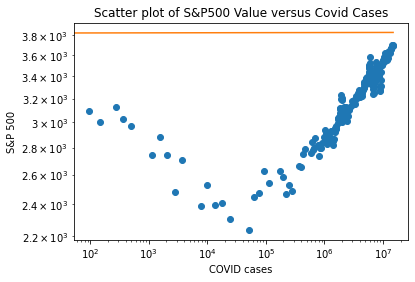

In [33]:
SPClose = spcovid['Close'] #Sets SPClose variable as the column of S&P500 closing price from the merged data set.
CovidCases = spcovid['positive'] #Sets SPClose variable as the column of S&P500 closing price from the merged data set.
plt.plot(CovidCases, SPClose, 'o') #Plots a scatter graph of days, with days on the x-axis and S&P value on the y-axis
#We now add a seprate graph / line which we plot on the same graph. This will be a regression line
res1 = linregress (CovidCases, SPClose) #Obtains regression line from Covid Cases and S&P500 closing price.
x = np.array([CovidCases.min(), CovidCases.max()]) #Creates an array of covid cases from min to max (Effectively acting as time), and sets it as the x-axis
y = res1.intercept + res1.slope * x #Sets the y-axis to be the result of the regression line.
plt.plot(x, y, '-') #Plots the above x and y as a straight line.
plt.xlabel('COVID cases') #Labels x-axis
plt.ylabel('S&P 500') #Labels y-axis
plt.xscale("log") #Sets scale of x-axis to be logarithmic, as this makes it easier to see changes than leaving the axis as standard base-10.
plt.yscale("log") #Does the same for y-axis
plt.title('Scatter plot of S&P500 Value versus Covid Cases'); #Gives title

print ('Correlation:',CovidCases.corr(SPClose)) #Returns the product moment correlation coefficient, another way of determining the strength of the relationship
print(res1)


Looking at the linear regression line, we can see that it does not follow the graph well, indicating that there is no linear relationship. We will check the correlation coefficient to see if there is a strong or weak, negative or positive relationship.

In [34]:
if (CovidCases.corr(SPClose)>0.5): 
  print('There is a strong positive relationship')
elif (0.5>CovidCases.corr(SPClose)>0):
  print('There is a weak positive relationship')
elif (0>CovidCases.corr(SPClose)>-0.5):
  print('There is a weak negative relationship')
elif (-0.5 >CovidCases.corr(SPClose)):
  print('There is a strong negative relationship')

There is a strong positive relationship


We will now do the same for the Dow, Nasdaq, and your stock.

Correlation: 0.6100374608907869


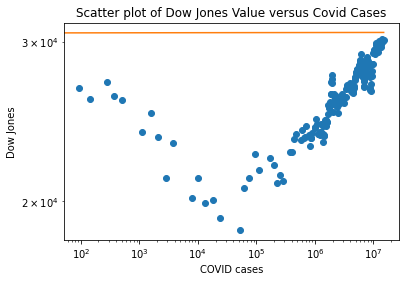

In [35]:
DowClose = dowcovid['Close'] #Sets DowClose variable as the column of Dow Jones closing price from the merged data set.
CovidCases = dowcovid['positive'] #Sets DowClose variable as the column of Dow Jones closing price from the merged data set.
plt.plot(CovidCases, DowClose, 'o') #Plots a scatter graph of days, with days on the x-axis and Dow value on the y-axis
from scipy.stats import linregress #We now add a seprate graph / line which we plot on the same graph. This will be a regression line
res1 = linregress (CovidCases, DowClose) #Obtains regression line from Covid Cases and Dow closing price.

fx = np.array([CovidCases.min(), CovidCases.max()]) #Creates an array of covid cases from min to max (Effectively acting as time), and sets it as the x-axis
fy = res1.intercept + res1.slope * fx #Sets the y-axis to be the result of the regression line.
plt.plot(fx, fy, '-') #Plots the above x and y as a straight line.
plt.xlabel('COVID cases') #Labels x-axis
plt.ylabel('Dow Jones') #Labels y-axis
plt.xscale("log") #Sets scale of x-axis as logarithmic
plt.yscale("log") #Sets scale of y-axis as logarithmic
plt.title('Scatter plot of Dow Jones Value versus Covid Cases'); #Gives title to graph
print ('Correlation:',CovidCases.corr(DowClose)) #returns Product moment correlation coefficient of Covid Cases and Dow closing price

Looking at the linear regression line, we can see that it does not follow the graph well, indicating that there is no linear relationship.

---



In [36]:
if (CovidCases.corr(DowClose)>0.5): 
  print('There is a strong positive relationship')
elif (0.5>CovidCases.corr(DowClose)>0):
  print('There is a weak positive relationship')
elif (0>CovidCases.corr(DowClose)>-0.5):
  print('There is a weak negative relationship')
elif (-0.5 >CovidCases.corr(DowClose)):
  print('There is a strong negative relationship')

There is a strong positive relationship


Correlation: 0.8751231594593476


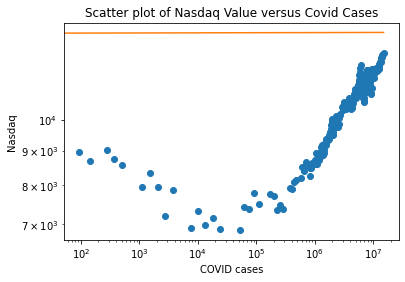

In [38]:
NasdaqClose = nasdaqcovid['Close'] #Same as code in previous two cells, except for Nasdaq
CovidCases = nasdaqcovid['positive']
plt.plot(CovidCases, NasdaqClose, 'o')
from scipy.stats import linregress
res1 = linregress (CovidCases, NasdaqClose)
res1
fx = np.array([CovidCases.min(), CovidCases.max()])
fy = res1.intercept + res1.slope * fx
plt.plot(fx, fy, '-')
plt.xlabel('COVID cases')
plt.ylabel('Nasdaq')
plt.xscale("log")
plt.ylabel('Nasdaq')
plt.yscale("log")
plt.title('Scatter plot of Nasdaq Value versus Covid Cases');
print ('Correlation:',CovidCases.corr(NasdaqClose))

Looking at the linear regression line, we can see that it does not follow the graph well, indicating that there is no linear relationship.

In [39]:
if (CovidCases.corr(NasdaqClose)>0.5): 
  print('There is a strong positive relationship')
elif (0.5>CovidCases.corr(NasdaqClose)>0):
  print('There is a weak positive relationship')
elif (0>CovidCases.corr(NasdaqClose)>-0.5):
  print('There is a weak negative relationship')
elif (-0.5 >CovidCases.corr(NasdaqClose)):
  print('There is a strong negative relationship')

There is a strong positive relationship


Correlation: 0.8081618884027781


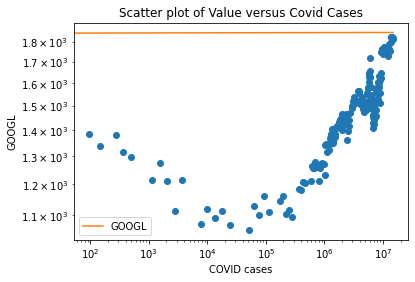

In [40]:
YourStockClose = yourstockcovid['Close'] #Same as code in previous 3 cells, except for your stock
CovidCases = yourstockcovid['positive']
plt.plot(CovidCases, YourStockClose, 'o')
from scipy.stats import linregress
res1 = linregress (CovidCases, YourStockClose)
res1
fx = np.array([CovidCases.min(), CovidCases.max()])
fy = res1.intercept + res1.slope * fx
plt.plot(fx, fy, '-', label = stockticker)
plt.xlabel('COVID cases')
plt.ylabel(stockticker)
plt.xscale("log")
plt.yscale("log")
plt.title('Scatter plot of Value versus Covid Cases')
plt.legend();
print ('Correlation:',CovidCases.corr(YourStockClose))

Looking at the 3 indices, it seems that if there is no linear relationship, then the intercept of the regression line is greater than the maximum value. We will test for this to see if this is the case for your stock.

In [41]:
if (res1.intercept > YourStockClose.max()):
  print("Weak or no regression")
if (res1.intercept < YourStockClose.max()):
  print("There might be regression. Look at the graph.")

There might be regression. Look at the graph.


In [42]:
if (CovidCases.corr(YourStockClose)>0.5): 
  print('There is a strong positive relationship')
elif (0.5>CovidCases.corr(YourStockClose)>0):
  print('There is a weak positive relationship')
elif (0>CovidCases.corr(YourStockClose)>-0.5):
  print('There is a weak negative relationship')
elif (-0.5 >CovidCases.corr(YourStockClose)):
  print('There is a strong negative relationship')

There is a strong positive relationship


So now we are at the end of our journey. Hopefully you gained some insight into how the US market has done throughout the COVID-19 pandemic, its relationship with the changes in COVID-19, and also whether you could beat the market during these turbulent times with your stock of choice. Overall, while the graphs seem to show that there are strong positive relationships between COVID-19 and US markets, common sense can tell us that this is not the case, and that to truly understand the effect of COVID-19 on our markets, we have to go beyond a simple statistical analysis.

In [ ]:
!{sys.executable} -m pip install nbconvert #Installs nbconvert to download this notebook in another format if needed.

In [33]:
!jupyter nbconvert --to html CS50ThornProject.ipynb #Converts this document to html format.

[NbConvertApp] Converting notebook CS50ThornProject.ipynb to html
[NbConvertApp] Writing 646434 bytes to CS50ThornProject.html
